# **AP155 Lab Assignment**
## Module 6: Random Process and Monte Carlo Methods

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.


### Student Information

_Full Name (Last Name, First Name)_: GERALDINO, Simon Paul Andrew M. \
_Student No._: 2020-11068\
_Section_: THU-HX-1

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: SIMON PAUL ANDREW M. GERALDINO**

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Problem 1 - []/100

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

### PROBLEM 1

**The Ising model**

_Refer to Exercise 10.9 in the Newman text._ The Ising model is a theoretical model of a magnet. The magnetic potential energy due to the interaction of two dipoles is proportional to their dot product, but in the Ising model this simplifies to just the product $s_i s_j$ for spins on sites $i$ and $j$ of the lattice, since the spins are one-dimensional scalars, not vectors. Then the actual energy of interaction is $-Js_i s_j$, where $J$ is a positive interaction constant. The minus sign ensures that the in- teractions are ferromagnetic, meaning the energy is lower when dipoles are lined up. A ferromagnetic interaction implies that the material will magnetize if given the chance.

Normally it is assumed that spins interact only with those that are immediately adjacent to them on the lattice, which gives a total energy for the entire system equal to
$$ E = -J \sum_{\langle ij \rangle} s_i s_j,$$
where the notation $\langle ij \rangle$ indicates a sum over pairs $i,j$ that are adjacent on the lattice. On the square lattice we use in this exercise each spin has four adjacent neighbors with which it interacts, except for the spins at the edges of the lattice, which have either two or three neighbors.

Perform a Markov chain Monte Carlo simulation of the Ising model on the square lattice for a system of 20 x 20 spins. You will need to set up variables to hold the value ±1 of the spin on each lattice site, probably using a two-dimensional integer array, and then take the following steps.

1. Write a function to calculate the total energy of the system, as given by the equation above. That is, for a given array of values of the spins, go through every pair of adjacent spins and add up the contributions $s_i s_j$ from all of them, then multiply by $-J$. Hint 1: Each unique pair of adjacent spins crops up only once in the sum. Thus there is a term $-Js_1s_2$ if spins 1 and 2 are adjacent to one another, but you do not also need a term $-Js_2s_1$. Hint 2: To make your final program to run in a reasonable amount of time, you will find it helpful if you can work out a way to calculate the energy using Python's ability to do arithmetic with entire arrays at once. If you do the calculation step by step, your program will be significantly slower. *(25 pts.)*

2. Now use your function as the basis for a Metropolis-style simulation of the Ising model with $J = 1$ and temperature $T = 1$ in units where the Boltzmann constant $k_B$ is also 1. Initially set the spin variables randomly to ±1, so that on average about a half of them are up and a half down, giving a total magneti- zation of roughly zero. Then choose a spin at random, flip it, and calculate the new energy after it is flipped, and hence also the change in energy as a result of the flip. Then decide whether to accept the flip using the Metropolis acceptance formula, Eq. (10.60). If the move is rejected you will have to flip the spin back to where it was. Otherwise you keep the flipped spip. Now repeat this process for many moves. *(25 pts.)*

3. Make a plot of the total magnetization $M = \sum_i s_i$ of the system as a function of time for a million Monte Carlo steps. You should see that the system develops a "spontaneous magnetization," a nonzero value of the overall magnetization. Hint: While you are working on your program, do shorter runs, of maybe ten thousand steps at a time. Once you have it working properly, do a longer run of a million steps to get the final results. *(25 pts.)*

4. Run your program several times and observe the sign of the magnetization that develops, positive or negative. Describe what you find and give a brief explana- tion of what is happening. *(25 pts.)*

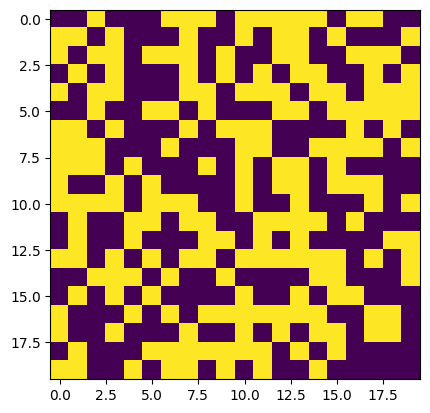

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# We set the length of the side of the square lattice
latticesize = 20

# We create a 20 x 20 array that randomizes the value of each lattice site,
# which chooses from either -1 or 1 as its spin value
lattice = np.random.choice([-1,1], (latticesize, latticesize))

# This shows the image representation of the "lattice" array
plt.imshow(lattice)

In [ ]:
# This is the interaction constant
J = 1

# This is the function to calculate the total energy of the system
def energy(latticesite):

    # We initially set this variable, which is the sum of the energies in the system, to zero.
    sum = 0

    # We will create this loop to get the sum for every row pair
    for i in np.arange(latticesize):
        for j in np.arange(latticesize - 1):
            sum += latticesite[i,j]*latticesite[i,j+1]

    # We will create this loop to get the sum for every column pair
    for i in np.arange(latticesize - 1):
        for j in np.arange(latticesize):
            sum += latticesite[i,j]*latticesite[i+1,j]

    # The total energy E is the product of -J and the sum
    E = -J*sum
    return E

E_initial = energy(lattice)

print("The total energy of the initial lattice is " + str(E_initial) + " J")


The total energy of the initial lattice is 80 J


E = 76


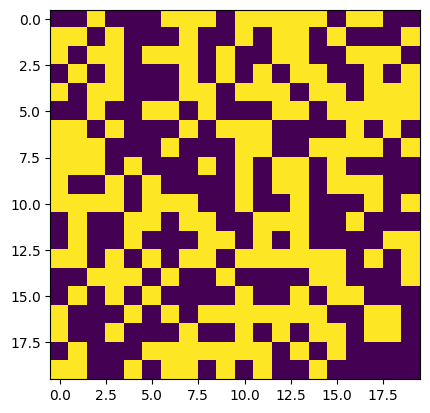

In [ ]:
# These are the constants given on the problem

# This is the interaction constant
J = 1

# This is the temperature
T = 1

# This is the Boltzmann's constant
k_b = 1

# This is the beta from the partition function
beta = 1/k_b*T

# This is the function that performs the Metropolis-style simulation of the Ising model
def metropolis(currentlattice):

    # We are going to copy the current lattice to test it
    latticeTest = currentlattice.copy()

    # We are going to generate random values for row x and column y to get a random lattice site
    x = int(20*np.random.rand())
    y = int(20*np.random.rand())

    # This is used to check the probability
    chance = np.random.rand()

    # Flips the spin of the random lattice site
    latticeTest[x,y] *= -1

    # We are going to create this statement to checkwhat happens to the lattice after the flip
    # If the total energy becomes lower, the flip is accepted
    if energy(latticeTest) <= energy(currentlattice):
        currentlattice = latticeTest.copy()
    # Else, it goes through the probability check
    else:
        # if the value of the "chance" variable is less than the exponential function, the flip is accepted
        if chance < np.exp(-beta*(energy(latticeTest) - energy(currentlattice))):
            currentlattice = latticeTest.copy()

    # In summary:
    # If Flip is accepted, the changed lattice will now be the "new" lattice
    # If Flip is rejected, the current lattice will stay the same
    return currentlattice

# This runs the function on the initial lattice
lattice = metropolis(lattice)

# To check if the lattice changed, we would print out the value for the total energy and
print("E = " + str(energy(lattice)))

# Show the image of the lattice
plt.imshow(lattice)


Overall magnetization: -400


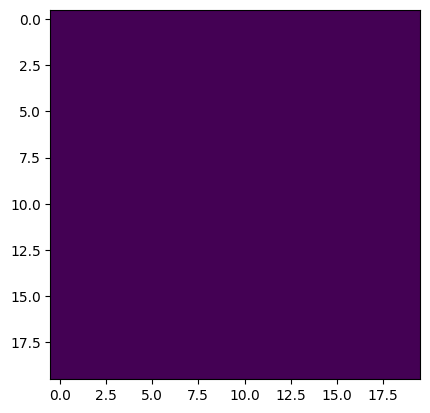

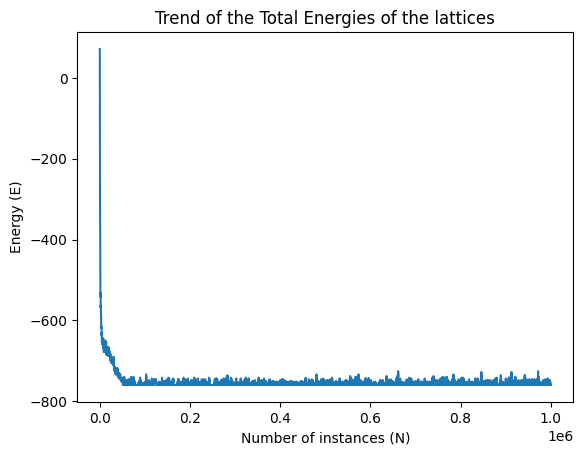

In [ ]:
# This is the number of steps/checks on using the Metropolis function
N = 1000000

# This is to create an empty array for the energy of the lattice on every iteration of the Metropolis test
E_list = []

# We are going to create this loop to run all instances of the test
for i in np.arange(N):
    lattice = metropolis(lattice)

    # Appends all the values to the "E_list" array
    E_list.append(energy(lattice))

# This is to create the figures and axes
fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()

# This shows the image of the "overall" lattice
ax1.imshow(lattice)

# This shows the trend of the total energies of the lattices over the number of iterations
ax2.plot(np.arange(1, N+1), E_list)
ax2.set(title = 'Trend of the Total Energies of the lattices',
        xlabel = 'Number of instances (N)',
        ylabel = 'Energy (E)')
print('Overall magnetization:', np.sum(lattice))

# Show the plots
plt.show()

In this attempt of using the Metropolis function using 1000000 steps, we can see that the trend of the total energy per lattice goes down exponentially at the start, then the values stay around the dip for the rest of the Monte Carlo steps.